In [1]:
import os
%run {os.environ['jupy']}/default.ipynb

In [2]:
import numpy as np
import os
import pandas as pd
import sys
from astropy.coordinates import SkyCoord
from astropy.io import ascii
from itertools import count
from matplotlib import pyplot as plt, ticker

from kids_ggl_pipeline.halomodel import nfw

# my code
from plottools import plotutils
plotutils.update_rcParams()

In [3]:
sim = 'RefL0100N1504'
snapshot = 26

plot_path = os.path.join('..', 'plots', sim, 'snapshot{0}'.format(snapshot))
if not os.path.isdir(plot_path):
    os.makedirs(plot_path)

In [4]:
path = os.path.join('..', '..', 'data', sim, 'snapshot{0}'.format(snapshot))
group = ascii.read(os.path.join(path, 'groups.txt'))
cent = ascii.read(os.path.join(path, 'centrals.txt'))
sat = ascii.read(os.path.join(path, 'satellites.txt'))
history = ascii.read(os.path.join(path, 'history.txt'))
group = pd.DataFrame(data=group.columns, columns=group.colnames)
cent = pd.DataFrame(data=cent.columns, columns=cent.colnames)
sat = pd.DataFrame(data=sat.columns, columns=sat.colnames)
history = pd.DataFrame(data=history.columns, columns=history.colnames)
print(group['x'].size, 'Groups:', group.columns)
print(cent['x'].size, 'Centrals:', cent.columns)
print(sat['x'].size, 'Satellites:', sat.columns)
display(group[:10])

12144 Groups: Index(['GroupID', 'x', 'y', 'z', 'M', 'M200c', 'M500c', 'M200m', 'R200c',
       'R500c', 'R200m', 'Nsub'],
      dtype='object')
7755 Centrals: Index(['GalaxyID', 'GroupID', 'xm', 'ym', 'zm', 'x', 'y', 'z', 'rhalf_DM',
       'rhalf_gas', 'rhalf_star', 'rphalf_DM', 'rphalf_gas', 'rphalf_star',
       'M', 'M_DM', 'Mstar', 'sfr', 'vx', 'vy', 'vz', 'vmax', 'r_vmax'],
      dtype='object')
5810 Satellites: Index(['GalaxyID', 'GroupID', 'xm', 'ym', 'zm', 'x', 'y', 'z', 'rhalf_DM',
       'rhalf_gas', 'rhalf_star', 'rphalf_DM', 'rphalf_gas', 'rphalf_star',
       'M', 'M_DM', 'Mstar', 'sfr', 'vx', 'vy', 'vz', 'vmax', 'r_vmax'],
      dtype='object')


,GroupID,x,y,z,M,M200c,M500c,M200m,R200c,R500c,R200m,Nsub
0,26000000000000,5.972742,75.567480,47.195652,4.652437e+14,3.318170e+14,2.562827e+14,3.974664e+14,1372.81340,928.07294,1942.3695,13778
1,26000000000001,18.708490,79.925210,54.138893,3.307497e+14,1.640183e+14,1.121906e+14,2.302421e+14,1085.45480,704.68950,1619.1412,9913
2,26000000000002,9.299732,35.015594,54.273197,3.145896e+14,2.626136e+14,1.943604e+14,3.246303e+14,1269.85800,846.32230,1815.5967,9315
3,26000000000003,52.289433,5.008444,20.171661,2.870586e+14,2.609669e+14,2.032776e+14,3.166482e+14,1267.19630,859.08563,1800.6168,7672
4,26000000000004,10.763284,81.740005,55.315815,2.356129e+14,1.877413e+14,1.289096e+14,2.526609e+14,1135.46950,738.09283,1670.0746,6888
5,26000000000005,77.636696,76.473850,41.852844,2.076781e+14,1.006561e+14,7.566555e+13,1.165533e+14,922.43100,617.97350,1290.4421,6903
6,26000000000006,75.868004,89.177760,41.862904,2.033329e+14,1.372079e+14,9.303660e+13,1.668726e+14,1022.81000,662.03690,1454.4614,5697
7,26000000000007,61.776466,33.598824,19.790958,1.214419e+14,4.835496e+13,3.006390e+13,7.664262e+13,722.44135,454.31085,1122.1727,4267
8,26000000000008,84.777565,47.120064,8.229006,1.121182e+14,9.996877e+13,7.716244e+13,1.274512e+14,920.30810,622.02910,1329.5000,3167
9,26000000000009,88.179230,50.473312,4.353087,1.059367e+14,8.665644e+13,5.986910e+13,1.143981e+14,877.52020,571.58670,1282.4464,3473


## Plot mass functions as-they-are

In [5]:
fig, ax = plt.subplots(figsize=(8,7))
bins = np.logspace(8.5, 15, 42)
# groups
#ax = axes[0]
ax.hist(group['M200c'], bins, histtype='step', lw=3, color='k', bottom=1,
        label='FoF groups')
ax.set_xlabel('$M_{200c}$ (M$_\odot$)')
# galaxies
#ax = axes[1]
for sample, name in zip((cent, sat), ('Centrals', 'Satellites')):
    ax.hist(sample['M'], bins, histtype='step', bottom=1,
            lw=3, label=name)
ax.set_xlabel('$M$ (M$_\odot$)')
#for ax in axes:
# dummy
for i in (1,):
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(1, 5e3)
    ax.legend(loc='best')
    ax.set_ylabel('$1+N(M)$')
    ax.xaxis.set_major_locator(ticker.LogLocator(base=10,numticks=7))
    ax.xaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1), numticks=7))

plotutils.savefig(os.path.join(plot_path, 'massfunction.pdf'), fig=fig);

Saved  to ../plots/RefL0100N1504/snapshot26/massfunction.pdf


## Match satellites (and centrals) to their respective group

In [6]:
def dist_to_host(gal, gr, suffixes=('_sat','_host')):
    merged = pd.merge(gal, gr, on='GroupID', suffixes=suffixes, how='left')
    merged['dist_host'] = np.sum(
        (sat[['x','y','z']].values - merged[['x_host','y_host','z_host']].values)**2,
        axis=1)**0.5
    merged['dist_host_norm'] = merged['dist_host'] / (merged['R200m']/1e3)
    for xy in [['x','y'], ['x','z'], ['y','z']]:
        merged['{0}dist_host'.format(''.join(xy))] = np.sum(
            (gal[xy].values \
                - merged[['{0}_host'.format(xy[0]),'{0}_host'.format(xy[1])]].values)**2,
            axis=1)**0.5
        merged['{0}dist_host_norm'.format(''.join(xy))] = \
            merged['{0}dist_host'.format(''.join(xy))] / (merged['R200m']/1e3)
    return merged


def find_nearest(gal, gr, merged=None, xy=''):
    """
    `xy=''` is equivalent to `xy='xyz'` (i.e., 3d distances)
    but will result in nicer labels (just "dist" instead of "xyzdist")
    """
    if not isinstance(xy, str):
        xy = ''.join(xy)
    if not xy:
        dist2 = np.sum((gal[['x','y','z']].values[:,np.newaxis] - gr[['x','y','z']].values)**2, axis=2)
    else:
        dist2 = np.sum((gal[list(xy)].values[:,np.newaxis] - gr[list(xy)].values)**2, axis=2)
    nearest = np.argmin(dist2, axis=1)
    if merged is None:
        merged = gal
    merged['{0}Nearest_idx'.format(xy)] = np.arange(gr.GroupID.size, dtype=int)[nearest]
    merged['{0}Nearest_ID'.format(xy)] = np.array(gr.GroupID, dtype=np.int64)[nearest]
    merged['{0}Nearest_dist'.format(xy)] = np.min(dist2, axis=1)**0.5
    merged['{0}Nearest_dist_norm'.format(xy)] = \
        merged['{0}Nearest_dist'.format(xy)] / np.array(gr.R200m/1e3)[nearest]
    return merged


In [7]:
satgr = dist_to_host(sat, group)

centgr = pd.merge(cent, group, on='GroupID', suffixes=('_cent', '_host'), how='left')
display(centgr[:10])
cent_massive = (centgr['M200m'] > 2e13)
print('{0} centrals of massive groups'.format(cent_massive.sum()))

cent_nearest = find_nearest(cent, group)
print('cent_nearest:')
display(cent_nearest[:10])

# 3d and 2d distances to nearest group
for xy in [[''], ['x','y'], ['x','z'], ['y','z']]:
    satgr = find_nearest(sat, group, satgr, xy)
    print('{0}/{1} galaxies are closer to a group that is not their host'.format(
            (satgr['{0}Nearest_dist'.format(''.join(xy))] < satgr['{0}dist_host'.format(''.join(xy))]).sum(),
            satgr['GalaxyID'].size))
    
print(np.sort(satgr.columns))
display(satgr[:10])

,GalaxyID,GroupID,xm,ym,zm,x_cent,y_cent,z_cent,rhalf_DM,rhalf_gas,...,y_host,z_host,M_host,M200c,M500c,M200m,R200c,R500c,R200m,Nsub
0,47681,26000000004706,7.926265,82.412620,56.205410,7.926164,82.412050,56.206936,30.990000,11.367657,...,82.412050,56.206936,2.820693e+11,2.011227e+11,1.663520e+11,2.671280e+11,116.179620,80.357346,170.14174,7.0
1,48094,26000000003441,20.711971,79.134995,53.254486,20.706180,79.136020,53.249050,53.012180,70.987610,...,79.136020,53.249050,4.245247e+11,2.620848e+11,1.930298e+11,3.231484e+11,126.899500,84.437190,181.28412,16.0
2,53605,26000000006034,15.637856,80.353730,53.106300,15.637446,80.352510,53.107452,30.617273,19.934559,...,80.352510,53.107452,1.842991e+11,1.482012e+11,1.294872e+11,1.745879e+11,104.936200,73.916820,147.64793,5.0
3,55735,26000000004522,17.775414,78.390045,54.464943,17.779785,78.387560,54.465120,40.050674,4.818975,...,78.387550,54.465120,2.392073e+11,1.606821e+11,1.179187e+11,2.460558e+11,107.801320,71.645570,165.54315,19.0
4,62450,26000100001103,14.985726,80.179850,50.979790,14.986866,80.178030,50.977577,40.339268,6.441914,...,80.178030,50.977577,1.442603e+11,1.331343e+11,1.049184e+11,1.592913e+11,101.252780,68.913070,143.20860,8.0
5,63432,26000000004760,20.038681,78.641470,52.615970,20.037958,78.641410,52.616833,40.430798,3.939164,...,78.641410,52.616833,3.098230e+11,2.288184e+11,1.853363e+11,2.752854e+11,121.284650,83.302810,171.84984,17.0
6,64988,26000100000087,12.937562,81.420760,54.255272,12.936369,81.421820,54.253094,24.806034,0.000000,...,81.421820,54.253094,1.601964e+11,1.184053e+11,9.892053e+10,1.676014e+11,97.372780,67.574326,145.65817,7.0
7,66591,26000100002864,8.464085,81.250960,56.244625,8.463855,81.250680,56.244260,19.657255,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,69314,26000100002221,13.853775,81.223130,56.858482,13.854639,81.220024,56.857870,24.565355,2.364759,...,81.220024,56.857864,1.127216e+11,9.499678e+10,7.966647e+10,1.275059e+11,90.477425,62.869965,132.96739,5.0
9,69845,26000100000133,9.154927,82.793910,57.595615,9.152954,82.795490,57.595780,37.744686,2.879714,...,82.795490,57.595780,1.589279e+11,1.451453e+11,1.201260e+11,1.737010e+11,104.211880,72.092810,147.40262,4.0


88 centrals of massive groups
cent_nearest:


,GalaxyID,GroupID,xm,ym,zm,x,y,z,rhalf_DM,rhalf_gas,...,sfr,vx,vy,vz,vmax,r_vmax,Nearest_idx,Nearest_ID,Nearest_dist,Nearest_dist_norm
0,47681,26000000004706,7.926265,82.412620,56.205410,7.926164,82.412050,56.206936,30.990000,11.367657,...,0.308155,734.790900,-648.092600,-530.76010,123.767654,14.397245,4705,26000000004706,0.000000e+00,0.000000
1,48094,26000000003441,20.711971,79.134995,53.254486,20.706180,79.136020,53.249050,53.012180,70.987610,...,0.224028,-1018.906000,196.054920,109.77600,115.052765,11.759777,3441,26000000003441,0.000000e+00,0.000000
2,53605,26000000006034,15.637856,80.353730,53.106300,15.637446,80.352510,53.107452,30.617273,19.934559,...,0.443948,-403.532230,-420.028320,203.41757,109.733340,12.586855,6031,26000000006034,1.000000e-06,0.000007
3,55735,26000000004522,17.775414,78.390045,54.464943,17.779785,78.387560,54.465120,40.050674,4.818975,...,0.453195,-917.044430,475.687870,345.46255,91.839480,15.178546,4521,26000000004522,1.000000e-05,0.000060
4,62450,26000100001103,14.985726,80.179850,50.979790,14.986866,80.178030,50.977577,40.339268,6.441914,...,0.154714,-190.360600,-306.990420,384.26960,88.161606,20.075340,8804,26000100001103,0.000000e+00,0.000000
5,63432,26000000004760,20.038681,78.641470,52.615970,20.037958,78.641410,52.616833,40.430798,3.939164,...,0.281347,-1014.587600,321.840450,-131.33235,110.369190,15.115102,4759,26000000004760,2.000000e-06,0.000012
6,64988,26000100000087,12.937562,81.420760,54.255272,12.936369,81.421820,54.253094,24.806034,0.000000,...,0.000000,16.317135,-88.891365,-409.05872,99.410800,16.708523,7823,26000100000087,1.000000e-06,0.000007
7,66591,26000100002864,8.464085,81.250960,56.244625,8.463855,81.250680,56.244260,19.657255,0.000000,...,0.000000,281.258200,56.155125,-450.94992,96.644540,12.274827,4705,26000000004706,1.280346e+00,7.525171
8,69314,26000100002221,13.853775,81.223130,56.858482,13.854639,81.220024,56.857870,24.565355,2.364759,...,0.120531,-247.421720,-374.861000,-1029.93440,93.707310,15.245285,9849,26000100002221,6.000000e-06,0.000045
9,69845,26000100000133,9.154927,82.793910,57.595615,9.152954,82.795490,57.595780,37.744686,2.879714,...,0.251360,822.730800,-686.770400,-765.86670,100.583420,10.958036,7866,26000100000133,0.000000e+00,0.000000


893/5810 galaxies are closer to a group that is not their host
2662/5810 galaxies are closer to a group that is not their host
2784/5810 galaxies are closer to a group that is not their host
2737/5810 galaxies are closer to a group that is not their host
['GalaxyID' 'GroupID' 'M200c' 'M200m' 'M500c' 'M_DM' 'M_host' 'M_sat'
 'Mstar' 'Nearest_ID' 'Nearest_dist' 'Nearest_dist_norm' 'Nearest_idx'
 'Nsub' 'R200c' 'R200m' 'R500c' 'dist_host' 'dist_host_norm' 'r_vmax'
 'rhalf_DM' 'rhalf_gas' 'rhalf_star' 'rphalf_DM' 'rphalf_gas' 'rphalf_star'
 'sfr' 'vmax' 'vx' 'vy' 'vz' 'x_host' 'x_sat' 'xm' 'xyNearest_ID'
 'xyNearest_dist' 'xyNearest_dist_norm' 'xyNearest_idx' 'xydist_host'
 'xydist_host_norm' 'xzNearest_ID' 'xzNearest_dist' 'xzNearest_dist_norm'
 'xzNearest_idx' 'xzdist_host' 'xzdist_host_norm' 'y_host' 'y_sat' 'ym'
 'yzNearest_ID' 'yzNearest_dist' 'yzNearest_dist_norm' 'yzNearest_idx'
 'yzdist_host' 'yzdist_host_norm' 'z_host' 'z_sat' 'zm']


,GalaxyID,GroupID,xm,ym,zm,x_sat,y_sat,z_sat,rhalf_DM,rhalf_gas,...,xyNearest_dist,xyNearest_dist_norm,xzNearest_idx,xzNearest_ID,xzNearest_dist,xzNearest_dist_norm,yzNearest_idx,yzNearest_ID,yzNearest_dist,yzNearest_dist_norm
0,3,26000000000004,10.676504,81.724070,55.323150,10.676117,81.723870,55.323174,8.904130,0.000000,...,0.088648,0.053080,4,26000000000004,0.087477,0.052379,4,26000000000004,0.017734,0.010619
1,13633,26000000000001,18.766990,79.880360,54.251564,18.766426,79.879480,54.251694,11.086453,0.000000,...,0.073809,0.045585,1,26000000000001,0.126809,0.078319,1,26000000000001,0.121718,0.075174
2,21795,26000000000004,10.640868,81.904700,55.391033,10.640938,81.904915,55.391296,8.631454,0.000000,...,0.205338,0.122952,4,26000000000004,0.143756,0.086078,10773,26000100003252,0.078064,0.592452
3,23303,26000000000004,10.720372,82.034325,55.440050,10.720102,82.035590,55.440372,13.246635,0.000000,...,0.298723,0.178868,4,26000000000004,0.131830,0.078937,10773,26000100003252,0.104941,0.796431
4,24474,26000000000004,10.720508,82.035150,55.439865,10.720475,82.035126,55.439842,0.000000,0.000000,...,0.298210,0.178561,4,26000000000004,0.131207,0.078564,10773,26000100003252,0.104240,0.791108
5,24479,26000000000001,17.905313,80.044450,53.676780,17.904818,80.044100,53.676167,16.616331,0.000000,...,0.446977,1.798582,4521,26000000004522,0.798799,4.825323,7190,26000000007201,0.187755,1.236537
6,26265,26000000000001,18.668016,79.865140,54.033566,18.667889,79.865000,54.033524,5.794720,0.000000,...,0.072620,0.044851,1,26000000000001,0.112921,0.069741,9016,26000100001331,0.032494,0.262573
7,27475,26000000000004,10.636128,81.933426,55.166782,10.636000,81.933440,55.166645,9.988746,0.000000,...,0.231556,0.138650,4,26000000000004,0.196094,0.117416,9765,26000100002129,0.059539,0.440050
8,28852,26000000000001,18.529860,80.159240,54.326656,18.529095,80.159780,54.326714,10.728441,0.000000,...,0.261690,2.016775,1,26000000000001,0.259729,0.160412,997,26000000000547,0.130675,0.321364
9,29819,26000000000004,12.315205,80.951805,55.128260,12.315942,80.956650,55.132570,25.242516,1.304345,...,0.468781,2.593679,8757,26000100001054,0.528399,3.686429,6303,26000000006306,0.288117,1.775073


Projection effects result in some cases in the host group not being the nearest group.

*It's not always projection effects.

#### As an example, the most massive cluster:

,GalaxyID,GroupID,xm,ym,zm,x_sat,y_sat,z_sat,rhalf_DM,rhalf_gas,...,xyNearest_dist,xyNearest_dist_norm,xzNearest_idx,xzNearest_ID,xzNearest_dist,xzNearest_dist_norm,yzNearest_idx,yzNearest_ID,yzNearest_dist,yzNearest_dist_norm
1,13633,26000000000001,18.766990,79.880360,54.251564,18.766426,79.879480,54.251694,11.086453,0.000000,...,0.073809,0.045585,1,26000000000001,0.126809,0.078319,1,26000000000001,0.121718,0.075174
5,24479,26000000000001,17.905313,80.044450,53.676780,17.904818,80.044100,53.676167,16.616331,0.000000,...,0.446977,1.798582,4521,26000000004522,0.798799,4.825323,7190,26000000007201,0.187755,1.236537
6,26265,26000000000001,18.668016,79.865140,54.033566,18.667889,79.865000,54.033524,5.794720,0.000000,...,0.072620,0.044851,1,26000000000001,0.112921,0.069741,9016,26000100001331,0.032494,0.262573
8,28852,26000000000001,18.529860,80.159240,54.326656,18.529095,80.159780,54.326714,10.728441,0.000000,...,0.261690,2.016775,1,26000000000001,0.259729,0.160412,997,26000000000547,0.130675,0.321364
10,30904,26000000000001,19.267372,79.736115,52.965157,19.265656,79.736374,52.965670,22.768785,0.000000,...,0.082979,0.598031,11277,26000100003853,0.170259,1.376162,8172,26000100000447,0.233684,1.620791
11,32368,26000000000001,19.243954,80.203070,52.711636,19.242620,80.202380,52.712185,23.673235,1.363582,...,0.394743,2.844908,11277,26000100003853,0.401189,3.242708,11906,26000100004761,0.278948,2.221887
12,33117,26000000000001,18.568920,80.856680,53.063164,18.568417,80.857570,53.063190,19.184624,3.636787,...,0.408857,2.034403,8750,26000100001047,0.702877,4.875177,2944,26000000002944,0.387535,1.782958
14,34158,26000000000001,18.792221,80.151665,53.991226,18.792078,80.151760,53.991146,7.140998,0.000000,...,0.241478,0.149140,1,26000000000001,0.169753,0.104841,7298,26000000007309,0.057585,0.388354
15,35659,26000000000001,17.671537,79.658640,53.000507,17.671133,79.658290,53.000504,13.149221,0.000000,...,0.340966,1.372008,6024,26000000006027,1.022192,7.621189,8172,26000100000447,0.317569,2.202596
16,36470,26000000000001,17.013485,78.562410,53.310310,17.013592,78.563190,53.310898,21.430124,0.000000,...,0.527261,2.834147,10789,26000100003270,0.578826,4.680178,2382,26000000002421,0.035464,0.194062


Group 26000000000001 contains 152 massive satellites
Its central subhalo is # 21109762.
134 satellites are closer to some other group in xy projection, belonging to 97 different groups,
the least massive of which is 1 with M=2.30e+14 Msun/h
xyNearest_dist [ 0.0463841   0.07262014  0.0738093   0.0802545   0.09157222  0.10470006
  0.10471971  0.10888441  0.12600846  0.14528349  0.14630656  0.1678359
  0.17050536  0.17093772  0.17155475  0.17265602  0.17283834  0.18379136
  0.18463421  0.18574814  0.19059557  0.19382658  0.21287338  0.21386917
  0.22009976  0.23975604  0.24137732  0.24147848  0.24617522  0.248645
  0.25232266  0.26169034  0.26222616  0.26324676  0.26453828  0.26625067
  0.27070184  0.27662417  0.29490349  0.30532167  0.30678008  0.31258723
  0.3154734   0.32024503  0.32698135  0.32773447  0.33362032  0.33646463
  0.34096644  0.34167042  0.35619726  0.36058449  0.361887    0.36417145
  0.36738056  0.36773225  0.38413268  0.40885659  0.41000958  0.44697718
  0.44879665  0.4

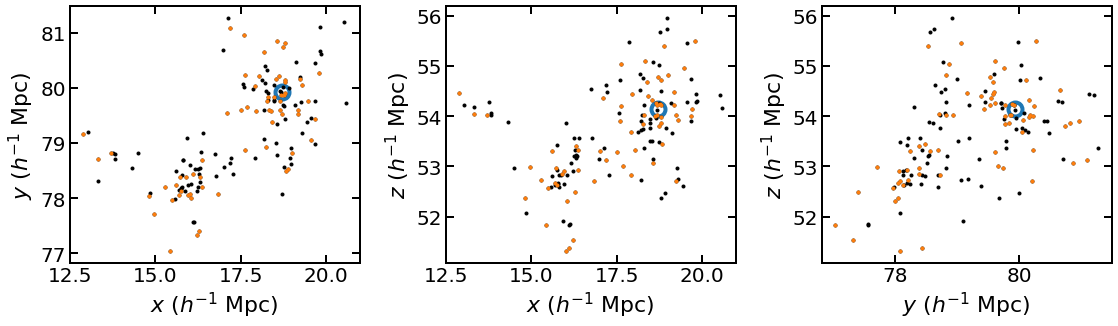

In [13]:
fig, axes = plt.subplots(figsize=(16,5), ncols=3)
example = 26000000000001
jgr = (group['GroupID'] == example)
j = (satgr['GroupID'] == example)
display(satgr[j][:10])
print('Group {0} contains {1} massive satellites'.format(example, j.sum()))
members = satgr[j]
example_cent = cent['GalaxyID'][cent['GroupID'] == example].values[0]
print('Its central subhalo is # {0}.'.format(example_cent))

projections = ('xy', 'xz', 'yz')
for ax, proj in zip(axes, projections):
    ax.plot(group[proj[0]][jgr], group[proj[1]][jgr], 'C0o', mfc='none', mew=4, ms=14)
    nearcol_id = '{0}Nearest_ID'.format(proj)
    nearcol = '{0}Nearest_dist'.format(proj)
    hostcol = '{0}dist_host'.format(proj)
    ax.plot(sat[proj[0]][j], sat[proj[1]][j], 'k.')
    # satellites which are closer in projection to some other group
    ambiguous = np.array([i for i, nearest, host
                          in zip(count(), satgr[nearcol][j], satgr[hostcol][j])
                          if (not np.isnan(host) and nearest < host)])
    print('{0} satellites are closer to some other group in {1} projection,'
          ' belonging to {2} different groups,'.format(
                ambiguous.size, proj, np.unique(satgr[nearcol_id][j][ambiguous]).size))
    print('the least massive of which is {0} with M={1:.2e} Msun/h'.format(
            np.argmin(satgr['M200m'][j][ambiguous]), satgr['M200m'][j][ambiguous].min()))
    print(nearcol, np.sort(satgr[nearcol][j][ambiguous]))
    #print(np.unique(satgr['x_host'][j][ambiguous]))
    ax.plot(sat[proj[0]][j][ambiguous], sat[proj[1]][j][ambiguous], 'C1.')
    # other FoF groups in the vicinity
    close = (np.sum(group))
    ax.set_xlabel('${0}$ ($h^{{-1}}$ Mpc)'.format(proj[0]))
    ax.set_ylabel('${0}$ ($h^{{-1}}$ Mpc)'.format(proj[1]))

fig.tight_layout();

In addition, some satellites are hosted by groups less massive than the cut I applied to the downloaded catalog
(namely, $M_{200m}>10^{11}\,h^{-1}\mathrm{M}_\odot$):

In [9]:
inmassive = np.isfinite(satgr['{0}{1}dist_host'.format(*xy)])
print('{0}/{1} satellites in massive groups'.format(inmassive.sum(), inmassive.size))
print('GroupID:', sat['GroupID'][~inmassive].values[0])
print('(x,y)_group:', satgr['x_host'][~inmassive].values[0],
      satgr['y_host'][~inmassive].values[0])
print('Entry in Group table:')
display(group[group['GroupID'] == 26000000003580])

5809/5810 satellites in massive groups
GroupID: 26000000003580
(x,y)_group: nan nan
Entry in Group table:


,GroupID,x,y,z,M,M200c,M500c,M200m,R200c,R500c,R200m,Nsub


These will be counted as not having been in a cluster previously

### Now match all galaxies to their nearest *cluster*

In [ ]:
Mcl_min = 2e13
cl = (group['M200m'] > Mcl_min)
print('There are {0} clusters with M > {1:.1e} Msun/h'.format(
        cl.sum(), Mcl_min))

cluster = group[cl]

gal = pd.concat([cent, sat])
galcl = find_nearest(gal, cluster)
for xy in ('xy','xz','yz'):
    galcl = find_nearest(gal, cluster, galcl, xy)
display(galcl[:10])

# removing the clusters' central galaxies:
cl_centrals = (galcl['Nearest_dist'] < 1e-4)
satcl = galcl[~cl_centrals]

Migh need to include indices in these merged tables to more easily cross-match the tables (for instance, when binning by cluster-centric distance and cluster mass)

## Plot the radial distribution of satellites in bins of group mass

In [ ]:
bins = np.logspace(-3, 2, 50)
xo = (bins[:-1]+bins[1:]) / 2
fig, ax = plt.subplots(figsize=(8,7))
for i, proj in enumerate(projections):
    print(np.isnan(satgr['{0}dist_host'.format(proj)]).sum())
    ax.hist(satgr['{0}dist_host'.format(proj)][inmassive], bins, color='C{0}'.format(i),
            histtype='step', lw=3, bottom=1, label=proj)
    ax.hist(satgr['{0}Nearest_dist'.format(proj)], bins, color='C{0}'.format(i),
            histtype='step', lw=3, ls='dashed', bottom=1, label='_none_')
# add NFW
rs = 50
sigma_s = 9e12
ynfw = nfw.sigma(xo/rs, sigma_s)
#ax.plot(xo, ynfw, 'k-', label='$\Sigma_\mathrm{{NFW}}$ ($r_\mathrm{{s}}={}$ $h^{{-1}}$ Mpc)'.format(rs))

ax.set_ylim(1, 1e3)
ax.set_xlabel('$R$ ($h^{-1}$ Mpc)')
ax.set_ylabel('$1+N(R)$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='upper right', fontsize=12);

It makes sense that the "Nearest" histograms (dashed) show a distribution towards smaller values than the "Host" histograms (solid).

### First, the total-to-stellar mass relation of central galaxies

In [ ]:
mstarbins = np.logspace(9, 12, 9)
mstar = (mstarbins[:-1]+mstarbins[1:]) / 2
ccut = pd.cut(centgr.Mstar, mstarbins)
cbinned = centgr.groupby(ccut)
m200m = cbinned.M200m.mean().values
m200m_lo = cbinned.M200m.quantile(0.16).values
m200m_hi = cbinned.M200m.quantile(0.84).values
cgood = np.isfinite(m200m)
print(cbinned.size().values)
print(m200m)

### Now of all satellites

In [ ]:
scut = pd.cut(satgr.Mstar, mstarbins)
sbinned = satgr.groupby(scut)
msub = sbinned.M_sat.mean().values
msub_lo = sbinned.M_sat.quantile(0.16).values
msub_hi = sbinned.M_sat.quantile(0.84).values
sgood = np.isfinite(msub)
print(sbinned.size().values)
print(msub)

### Now of satellites binned by (3d) distance to host group/cluster

In [ ]:
def mean(groupby_obj, colname, shape, axis=0):
    N = groupby_obj.count()[colname].fillna(0).values.reshape(shape)
    avg = groupby_obj.mean()[colname].fillna(0).values.reshape(shape)
    return np.sum(avg*N, axis=axis) / np.sum(N, axis=axis)

In [ ]:
Rbins = np.array([0.01, 0.3, 0.5, 1, 2, 5])
R = (Rbins[:-1]+Rbins[1:]) / 2
#print(satgr.columns)

# Note that cluster sizes are given in pkpc
sRbinned = satgr.groupby([scut, pd.cut(satgr.dist_host_norm, Rbins)])
#print(satgr.dist_host/satgr.R200m)
msub_R = sRbinned.mean().M_sat.values.reshape((mstar.size,R.size))
#print(msub_R)
# average normalized cluster-centric distance
Ravg_sat = mean(sRbinned, 'dist_host_norm', (mstar.size,R.size))
print(Ravg_sat)

### Now of all galaxies binned by distance to nearest massive cluster

In [ ]:
print(galcl.columns)
clbinned = galcl.groupby([pd.cut(galcl.Mstar, mstarbins),
                          pd.cut(galcl.Nearest_dist, Rbins)])
msub_cl = clbinned.mean().M.values.reshape((mstar.size,R.size))
Ravg_cl = mean(clbinned, 'Nearest_dist_norm', (mstar.size,R.size))
print(Ravg_cl)

Their histogram is shown below:

In [ ]:
fig, ax = plt.subplots(figsize=(8,7))
bins_Rhist = np.arange(0, 50.01, 0.5)
ax.hist(satcl.Nearest_dist_norm, bins_Rhist, histtype='step', lw=2);
#ax.set_yscale('log');

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$m_\star\,(h^{-1}\,\mathrm{M}_\odot$)')
#ax.set_ylabel('$M_{200m}\,(h^{-1}\,\mathrm{M}_\odot$)')
ax.set_ylabel(r'$M_\mathrm{tot}\,(h^{-1}\,\mathrm{M}_\odot)$')

# centrals
ax.plot(mstar, m200m, 'k-', lw=2,
        label='Centrals ($M_\mathrm{tot}=M_{200m}$)')
ax.fill_between(mstar[cgood], m200m_lo[cgood], m200m_hi[cgood],
                color='k', alpha=0.3, zorder=-1)
# all satellites
satcolor = '0.6'
ax.plot(mstar, msub, '-', color=satcolor, lw=2,
        label='All satellites ($M_\mathrm{tot}=m_\mathrm{sub}$)')
ax.fill_between(mstar[sgood], msub_lo[sgood], msub_hi[sgood],
                color=satcolor, alpha=0.3, zorder=-1)
# satellites binned by distance to the centre
lines = []
# need 2 colorbars because the arrays of Ravg are different
## might want to make a discrete colorbar so I don't have to worry about
## little differences in average R between the two samples.
colors, colorbar = plotutils.colorscale(
    n=Ravg_sat.size, vmin=0, vmax=Rbins[-1], cmap='plasma')
for i in range(R.size):
    # in all groups
    ax.plot(mstar, msub_R[:,i], dashes=(8,2), color=colors[i], lw=2)#,
            #label='{0} $<$ $R/R_{{200m}}$ $<$ {1}'.format(Rbins[i],Rbins[i+1]))
    # in massive groups
    ax.plot(mstar, msub_cl[:,i], '-', color=colors[i], lw=2,
            label='_none_')
    if i == 0:
        lines.append(ax.plot([], [], 'k', dashes=(8,2), lw=2)[0])
        lines.append(ax.plot([], [], 'k-')[0])
#cbar = plt.colorbar(colorbar, ax=ax, orientation='horizontal', pad=0.1)
cbar = plt.colorbar(colorbar, ax=ax)#, orientation='horizontal', pad=0.1)
cbar.set_label('$R/R_{{200m}}$')

leg = ax.legend(loc='upper left', fontsize=12, frameon=False)
ax.annotate('Colors:', xy=(1.8e10,2.5e10), ha='left', va='bottom', fontsize=12)
ax.legend(lines,
          ('Satellites of all groups', 'Galaxies around massive groups'),
          loc='lower right', fontsize=12, frameon=False)
plt.gca().add_artist(leg)
plotutils.savefig(os.path.join(plot_path, 'total_to_stellar_groups_and_clusters.pdf'));

Distances in the plot above are 3-dimensional. A quick look at binning by projected distance shows that differences between bins are somewhat reduced (as expected).

I don't think dashed and dotted lines should be terribly correlated because the vast majority of groups are less massive than my "clusters"

### Now plot the opposite projection

Such a plot can be compared to the one in Knebe+11 which shows the bias in recovered mass as a function of halo-centric distance: can the bias in SUBFIND explain the trend?

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
ax.set_xscale('log')
ax.set_xlabel('$R/R_{200m}$')
ax.set_ylabel('$M_\mathrm{tot}/m_\star$')

colors, colorbar = plotutils.colorscale(
    array=np.log10(mstar), cmap='plasma')

for i in range(mstar.size):
    print(mstar[i], msub_R[i])
    ax.plot(R, msub_R[i]/mstar[i], 'o-', color=colors[i], lw=2)
    
cbar = plt.colorbar(colorbar, ax=ax)
cbar.set_label('$\log [m_\star$/($h^{-1}$ M$_\odot$)]');

What is the range shown in my papers and others? 